<a href="https://colab.research.google.com/github/eulerianKnight/probabilistic-ml/blob/main/introduction_to_tensorflow_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
tf.random.set_seed(31415926)

# Tensorflow Distributions

In [2]:
# Instantiate Tensorflow Distribution object
tfd = tfp.distributions

## Univariate Distributions

### Normal Distribution

In [3]:
# Create a Normal Distribution with mean = 0, std = 1
normal = tfd.Normal(loc=0, scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

**In above case, the `batch_shape` and `event_shape` shows that it is a Single and Scalar Distribution.**

In [4]:
# Sample from above Distribution
print(f"A Single Sample from normal distribution: \n{normal.sample()}")
print(f"Multiple Samples from normal distribution: \n{normal.sample(10)}")

A Single Sample from normal distribution: 
0.41906797885894775
Multiple Samples from normal distribution: 
[ 9.9106741e-01  3.0131219e-03  1.1420341e+00  1.3669432e-03
 -1.0187918e+00  1.1704360e-01 -2.3411982e-01 -9.6883655e-01
  2.7054578e-01  1.8928089e+00]


In [5]:
# Obtain Value of Probability's Density
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [6]:
# Obtain value of Log Probability
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

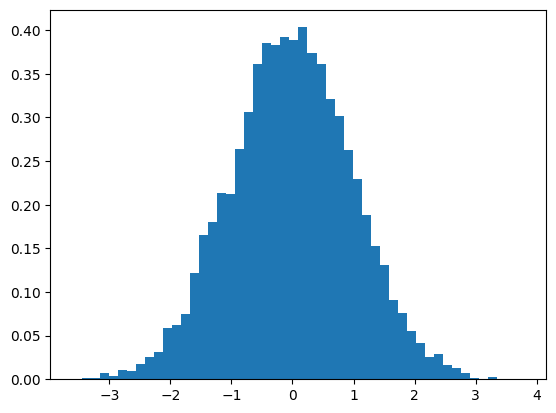

In [7]:
# Plot a Histogram, approximating the density
plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

### Exponential Distribution

In [8]:
# Create an Exponential Distribution
exponential = tfd.Exponential(rate=1)
exponential

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

In [9]:
# Sample from distribution
exponential.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.059567124>

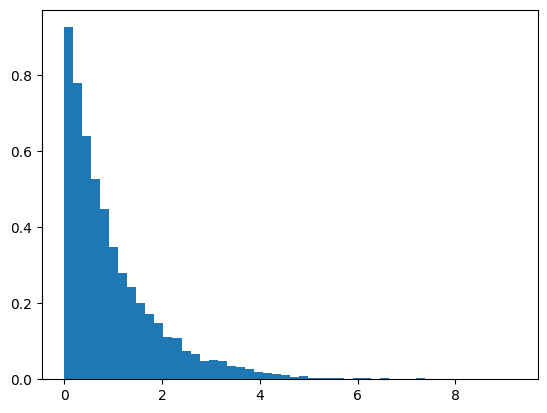

In [10]:
# Plot a Histogram, approximating the density
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

### Bernoulli Distribution (Discrete Distribution)

In [11]:
bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [12]:
# Sample from distribution
bernoulli.sample(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)>

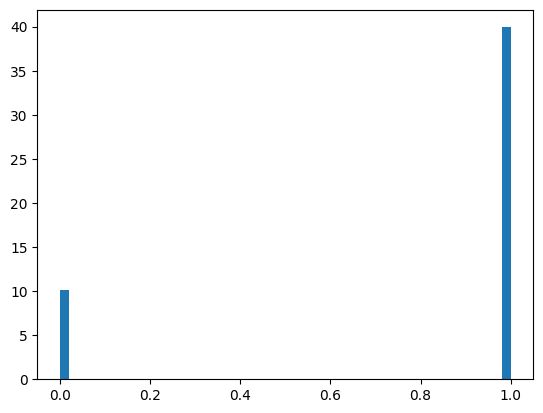

In [13]:
# Plot
plt.hist(bernoulli.sample(10000), bins=50, density=True)
plt.show()

### Batched Distribution

In [14]:
# Create a batched Bernoulli Distribution
bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

**In above case `batch_shape` suggests that there are 5 different 
 scalar distributions**

In [15]:
# Sample from batched distribution
bernoulli_batch.sample(10)

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1]], dtype=int32)>

In [16]:
# Use a Batch shape with higher rank
probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]

bernoulli_batch_2d = tfd.Bernoulli(probs=probs)
bernoulli_batch_2d

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [17]:
bernoulli_batch_2d.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [1, 1]]],


       [[[1, 1],
         [0, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [1, 1]]],


       [[[1, 1],
         [1, 0],
         [1, 1]]],


       [[[1, 1],
         [0, 1],
         [1, 1]]]], dtype=int32)>

In [18]:
# Determine Probabilities from this batch
bernoulli_batch_2d.prob([[[1, 0], [0, 0], [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>

## Multivariate Distributions(No Covariance)

### Basic Multivariate Distributions

In [19]:
# Create 2D Multivariate Gaussian with diagonal covariance matrix
normal_diag = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

**In above case `event_shape` suggests that the distribution has 2 variables.**

In [20]:
# Sample from multivariate distribution.
normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.18358183,  1.0185744 ],
       [-1.4671202 ,  1.467435  ],
       [ 0.31314552, -0.44345582],
       [-0.62315476,  1.7467985 ],
       [ 0.48052043,  3.9914598 ],
       [ 0.84836304,  0.5193473 ],
       [-1.3563156 ,  2.880795  ],
       [-0.91929096, -0.60377717],
       [ 0.01089452, -0.5800375 ],
       [ 0.76173794, -0.91469467]], dtype=float32)>

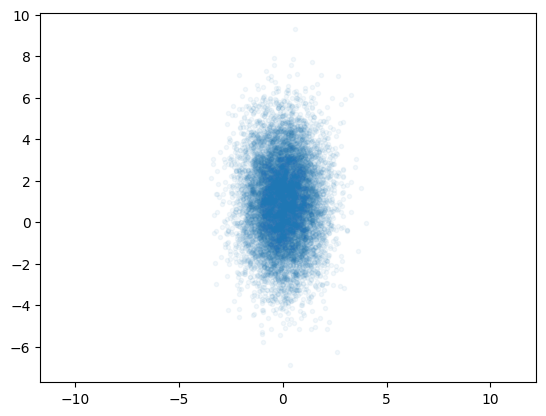

In [21]:
# Make a plot
plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

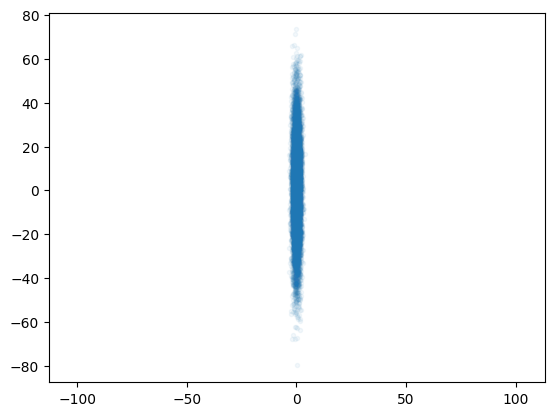

In [22]:
# Spreading data out by adjusting the Standard Deviation
normal_diag_spread = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 20])
# Make a plot
plt_sample = normal_diag_spread.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

### Batches of MultiVariate Distribution

In [23]:
# Create three batches of Multivariate Distribution
normal_diag_batches = tfd.MultivariateNormalDiag(loc=[[0, 0], [0, 0], [0, 0]], 
                                                 scale_diag=[[1, 2], [2, 1], [2, 2]])
normal_diag_batches

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [24]:
# Sample from distribution
samples = normal_diag_batches.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-1.8986902 , -2.576434  ],
        [-2.2003102 ,  0.9154822 ],
        [ 1.8136464 ,  1.4293334 ]],

       [[-0.7624447 , -1.7474716 ],
        [ 2.7744558 , -1.7857573 ],
        [ 2.7699447 , -1.8134074 ]],

       [[-1.7995174 ,  1.9210657 ],
        [ 0.7569565 ,  0.1028127 ],
        [-0.2185004 , -3.9969444 ]],

       [[-1.4024938 , -0.10722312],
        [ 1.1850269 ,  0.7092123 ],
        [-4.524385  , -0.7746293 ]],

       [[ 1.2437402 , -1.7173738 ],
        [-3.1303282 ,  0.05639871],
        [ 1.0558165 , -1.6876658 ]]], dtype=float32)>

In [25]:
# Compute Log Probs
normal_diag_batches.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-5.1632876, -3.5552487, -3.8907099],
       [-3.2033923, -5.0876894, -4.594301 ],
       [-4.6114674, -2.6079323, -5.2270846],
       [-3.5159557, -2.9580512, -5.857935 ],
       [-3.6731405, -3.757484 , -3.719542 ]], dtype=float32)>

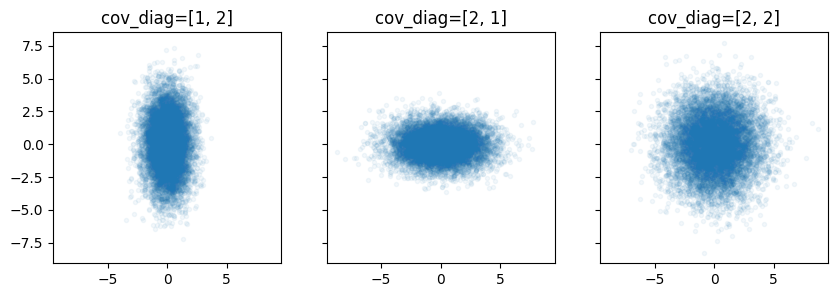

In [26]:
# Create a Plot
plt_sample_batch = normal_diag_batches.sample(10000)

fig, axes = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]', 'cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axes, titles)):
    samples = plt_sample_batch[:,i,:] # Take ith batch
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()

## Multivariate Distributions(Full Covariance)

- A Covariance Matrix must have following properties:
    - It is symmetric.
    - It is positive (semi-) definite.

- A Symmetric Matrix $M \in \mathbb{R}^{d\times d}$ is positive semi-definite if it satisfies $b^TMb \ge 0$ for all nonzero $b\in\mathbb{R}^d$. If in addition, we have $b^TMb = 0 \Rightarrow b=0$ then $M$ is positive definite.

- Cholesky Decomposition
>For every real-valued symmetric positive-definite matrix $M$, there is a unique lower-diagnol matrix $L$ that has positve diagnol entries for which
>
> \begin{equation}
    LL^T = M
    \end{equation}


In [27]:
# Create a Covariance Matrix
mu = [0., 0.]
scale_tril = [[1., 0.], [0.6, 0.8]]

# Get a Covariance Matrix
sigma = tf.matmul(tf.constant(scale_tril), tf.transpose(tf.constant(scale_tril)))
sigma

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0.6],
       [0.6, 1. ]], dtype=float32)>

In [28]:
# Create a 2D Gaussian with Full Covariance
nonspherical_2d_gaussian = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)
nonspherical_2d_gaussian

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

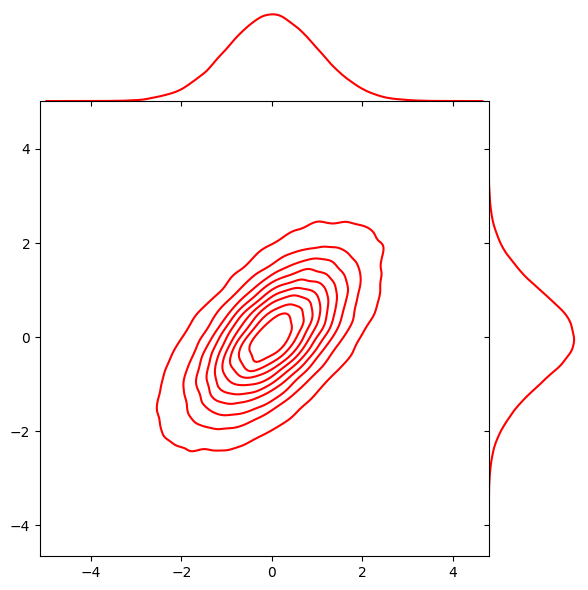

In [29]:
# Sample the distribution and plot
sample = nonspherical_2d_gaussian.sample(100000)
sns.jointplot(x=sample[:, 0], 
              y=sample[:, 1], 
              kind='kde', 
              space=0, 
              color='r')

### Using Cholesky Decomposition

In [30]:
# Define mu
mu = [1., 2., 3.]
# Define a symmetric positive-definite matrix
sigma = [[0.5, 0.1, 0.1], [0.1, 1., 0.6], [0.1, 0.6, 2.]]

# Compute Lower Triangular Matrix L from Cholesky Decomposition
try:
    scale_tril = tf.linalg.cholesky(sigma)
except Exception as e:
    print(e)

# Create Multivariate Gaussian Distribution
multivariate_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)
print(f"Mean of distribution: {multivariate_normal.mean()}")
print(f"Covariance of distribution: {multivariate_normal.covariance()}")

Mean of distribution: [1. 2. 3.]
Covariance of distribution: [[0.49999997 0.1        0.1       ]
 [0.1        1.0000001  0.6       ]
 [0.1        0.6        2.        ]]


## Independent Distribution

In [31]:
# Define batch of two univariate Gaussians
# Combine them into a bivariate Gaussian with Independent Components
locs = [-1., 1]
scales = [0.5, 1.]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

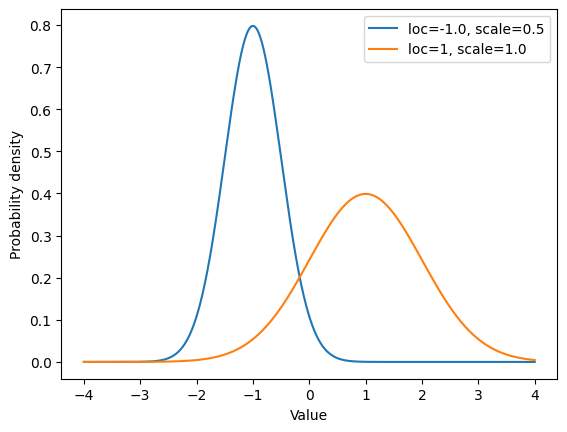

In [32]:
# Univariate Density Functions
t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1))

sns.lineplot(x=t, y=densities[:, 0], label=f'loc={locs[0]}, scale={scales[0]}')
sns.lineplot(x=t, y=densities[:, 1], label=f'loc={locs[1]}, scale={scales[1]}')
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [33]:
# Use Independent distribution to convert batch of distributions to Multivariate distribution
# Convert batch_shape to event_shape
bivariate_normal_from_independent = tfd.Independent(batch_of_normals, 
                                                    reinterpreted_batch_ndims=1)
bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [34]:
bivariate_normal_from_independent.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.035204  , -0.44438136],
       [-0.7214601 ,  0.3592847 ],
       [ 0.17942226,  1.0046289 ],
       [-1.2463405 ,  1.6791083 ],
       [-1.1585021 ,  1.8534503 ]], dtype=float32)>

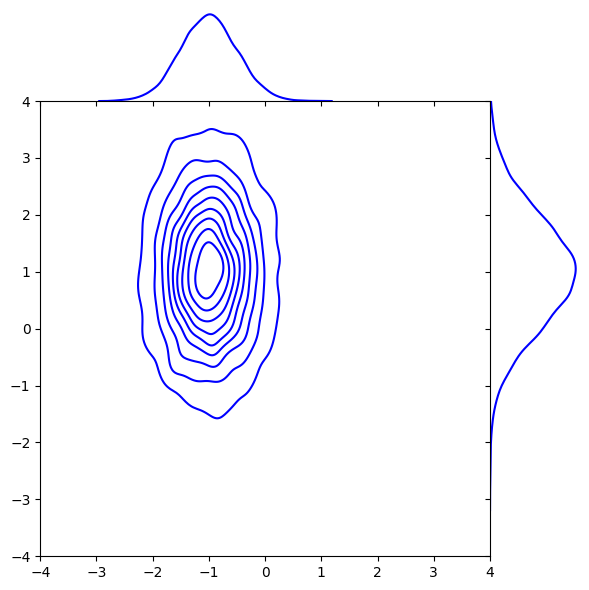

In [35]:
# Create a Plot showing joint density contours and marginal density functions
samples = bivariate_normal_from_independent.sample(10000)
sns.jointplot(x=samples[:, 0], 
              y=samples[:, 1], 
              kind='kde', 
              space=0, 
              color='b', 
              xlim=[-4, 4], 
              ylim=[-4, 4])

### Shifting `batch_dimensions` to `event_dimensions` using `reinterpreted_batch_indices`.

In [36]:
# Create a 3X2 batch of Normal distribution
loc_grid = [[-100., -100.], 
            [100., 100.], 
            [0., 0.]]
scale_grid = [[1., 10.], 
              [1., 10.], 
              [1., 1.]]
normal_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)
normal_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [37]:
# Create a Bivariate Normal Distribution of Batch dimension 3 from above
normal_batch_3_event_2 = tfd.Independent(normal_batch_3by2_event_1)
normal_batch_3_event_2

Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [38]:
# Can reinterpret all batch size
normal_batch_1_event_3by2 = tfd.Independent(normal_batch_3by2_event_1, 
                                            reinterpreted_batch_ndims=2)
normal_batch_1_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

## Sampling and Log Probs

In [39]:
# Create a Multivariate Distribution
normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]], 
                                                  scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [40]:
# Create a higher rank Distribution than the previous one
loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]], [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

**TensorFlow will interpret the final axis as the event dimension and broadcast over the remaining dimension to give the batch size.**

In [41]:
# Use Independent to move part of the batch shape
ind_normal_distributions = tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [42]:
# Draw some samples
samples = ind_normal_distributions.sample(5)
samples.shape

TensorShape([5, 2, 2, 3])

In [43]:
# '[B, E]' shaped input
inp = tf.random.uniform((2, 2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -9.2958555, -67.238976 ], dtype=float32)>

In [44]:
# Broadcasting over batch_size
inp = tf.random.uniform((2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -9.491455, -68.66077 ], dtype=float32)>

In [45]:
# Broadcasting over sample
inp = tf.random.uniform((2, 2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-13.112623, -75.71086 ], dtype=float32)>

### Trainable Distributions

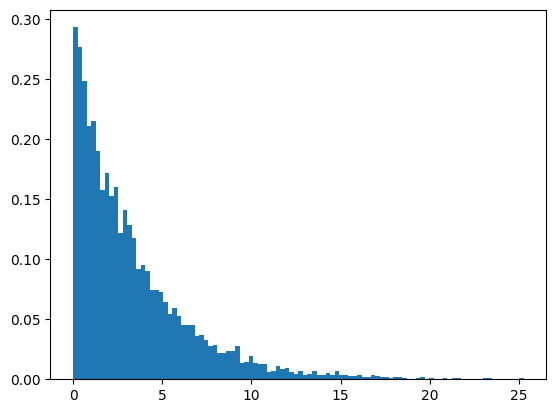

In [133]:
# Define an exponential distribution
exponential = tfd.Exponential(rate=0.3, name='exp')
plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [123]:
# Define an exponential distribution with a trainable rate parameter
exp_train = tfd.Exponential(rate=tf.Variable(1., name='rate'), name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

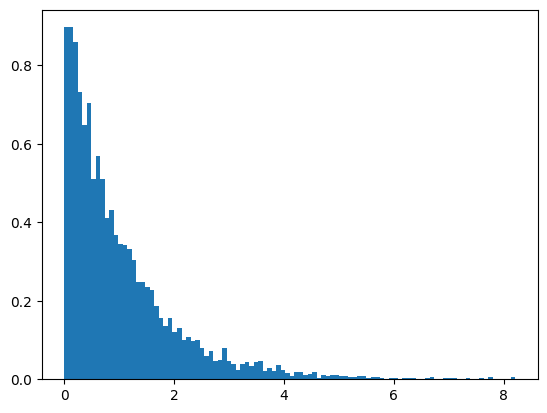

In [134]:
plt.hist(exp_train.sample(5000), bins=100, density=True)
plt.show()

In [124]:
# Define the negative log likelihood

def nll(x_train, distribution):
    return -tf.reduce_mean(distribution.log_prob(x_train))

In [125]:
# Define a function to compute the loss and gradients

@tf.function
def get_loss_and_grads(x_train, distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss = nll(x_train, distribution)
        grads = tape.gradient(loss, distribution.trainable_variables)
    return loss, grads

In [131]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep Result for Plotting
    train_loss_results = []
    train_rate_results = []

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
    num_steps = 10
    for i in range(num_steps):
        loss, grads = get_loss_and_grads(data, distribution)
        optimizer.apply_gradients(zip(grads, distribution.trainable_variables))

        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        print(f"Step {i}: loss: {loss}: Rate: {rate_value}")
    return train_loss_results, train_rate_results

In [135]:
# Get some data and train
sampled_data = exponential.sample(5000)
train_loss_results, train_rate_results = exponential_dist_optimisation(data=sampled_data, 
                                                                       distribution=exp_train)

Step 0: loss: 3.345935106277466: Rate: 0.8689207434654236
Step 1: loss: 3.0744357109069824: Rate: 0.757637083530426
Step 2: loss: 2.835730791091919: Rate: 0.6548054218292236
Step 3: loss: 2.6343836784362793: Rate: 0.5623376965522766
Step 4: loss: 2.4743998050689697: Rate: 0.48242589831352234
Step 5: loss: 2.3578507900238037: Rate: 0.4172424077987671
Step 6: loss: 2.2829172611236572: Rate: 0.36825045943260193
Step 7: loss: 2.242398738861084: Rate: 0.335201233625412
Step 8: loss: 2.224839448928833: Rate: 0.3155389726161957
Step 9: loss: 2.218898057937622: Rate: 0.30517157912254333


In [136]:
# Predicted Value for Rate Parameter
pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print(f"Exact Value: {exact_value}")
print(f"Prediction rate: {pred_value}")

Exact Value: 0.30000001192092896
Prediction rate: 0.30517157912254333


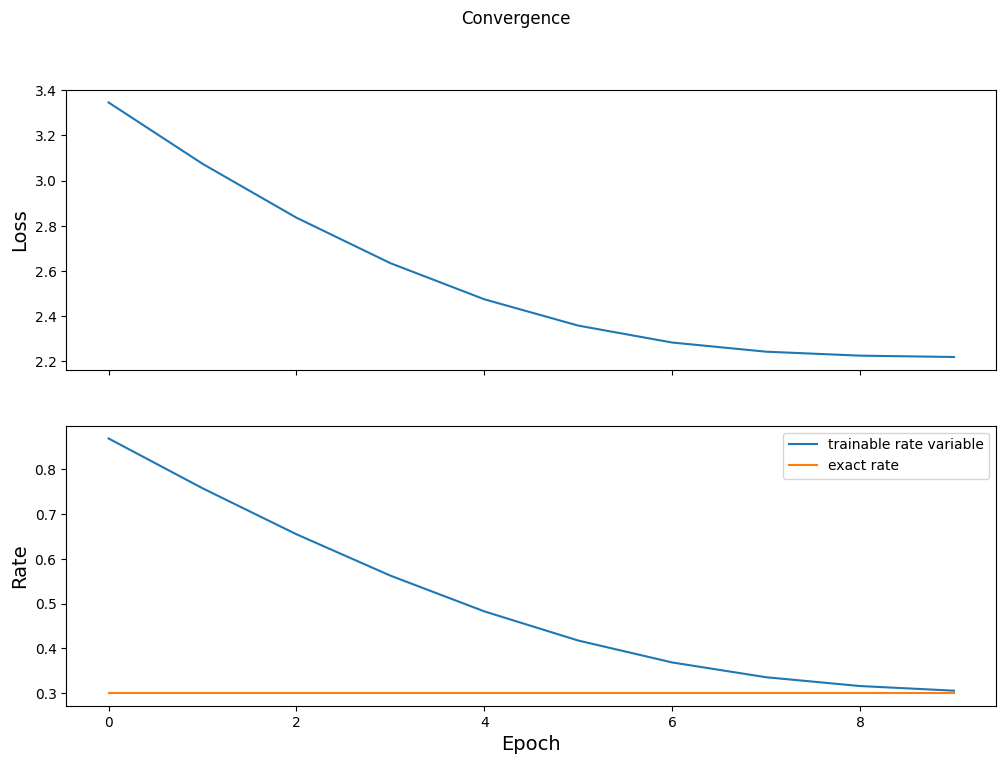

In [137]:
# Plot to see Convergence of the estimated and true parameters
tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Rate', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

## Build a Naive Bayes Classifier using Independent Distribution

- Assuming Each feature is independent of each other given a class.
- The features are modeled as class conditional probability distribution derived from training data.
- In this case the data comprises of vectors consisting 0 and 1 so Bernoulli Distribution makes more sense.
- Laplacian Smoothing is required to prevent underflow.(If a word is not present in the test data, the log probability will become negative infinity. In order to avoid this, a certain value called as smoothing value to the sthe sum of words that occur in every class.)
- At inference time, Bayes theorem is used to calculate the probability of each class given a data point.

### Get the Data

In [120]:
# Get the NewsGroup dataset from Sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

In [106]:
# Function to Get data
def get_data(categories):

    # Download data from slearn
    newsgroups_train_data = fetch_20newsgroups(subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(subset='test', categories=categories)
    # Store length of dataset
    n_documents = len(newsgroups_train_data['data'])
    # Create Vectors
    count_vectorizer = CountVectorizer(input='content', 
                                       binary=True, 
                                       max_df=0.25, 
                                       min_df=1.01/n_documents)
    # Create Bag of Words
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data'])

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']), (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

### Apply Laplacian Smoothing to the counts.

In [107]:
# Function to create Laplacian Smoothing
def laplace_smoothing(labels, binary_data, n_classes):
    # Compute Parameter estimates
    n_words = binary_data.shape[1]
    alpha = 1 # Parameters for Laplacian Smoothing
    theta = np.zeros([n_classes, n_words])
    for c_k in range(n_classes):
        class_mask = (labels == c_k)
        N = class_mask.sum()
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha) / (N + alpha*2)
    return theta

In [108]:
# Get a Subset of 20 Newsgroup dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)
smoothed_counts = laplace_smoothing(labels=train_labels, 
                                    binary_data=train_data, 
                                    n_classes=len(categories))

### Compute Prior Probability.

- Prior Probability of every class based on frequency of occurrence in the dataset.

In [109]:
def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print(f"The class priors are {priors}")
    return priors

In [110]:
# Run the function
priors = class_priors(n_classes=len(categories), labels=train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [111]:
# Create a function to return a Bernoulli distribution
# batch_shape = Number of classes | event_shape=Number of features
def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoullis, 
                           reinterpreted_batch_ndims=1)
    return dist

In [112]:
# Check the function
tf_dist = make_distributions(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

### Build Classifier

- Compute Class Conditional Probabilities.
- Form a Joint Probability.
- Normalise the Joint Likelihood and return the log prob

In [118]:
def predict_sample(dist, sample, priors):
    # Compute Conditional Probability
    cond_probs = np.array(dist.log_prob(sample))
    # Form a Joint Probability
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    # Normalise
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, 
                                           axis=-1, 
                                           keepdims=True)
    log_prob = joint_likelihood - norm_factor
    return log_prob

In [119]:
# Compute log_probs
# Predicting one example from test data
log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([-6.17362697e+01, -8.98572429e-06, -1.16198779e+01, -6.33278320e+01])>

In [122]:
# Loop over test data and classify
probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis=-1)
print(f"F1: {f1_score(test_labels, predicted_classes, average='macro')}")

F1: 0.7848499112849504


## Build a Naive Classifier Using Trainable Distributions

In [138]:
# Function to learn the distribution using Gradient Tape
def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high=0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0, nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print(f"Class: {c_num}")

        for i in range(0, 100):
            loss, grads = get_loss_and_grads(class_data[c_num], distributions[c_num])
            if (i%10==0):
                print(f"iter: {i} loss: {loss}")
            optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))
            eta = 1e-3
            clipped_probs = tf.clip_by_value(distributions[c_num].trainable_variables, 
                                             clip_value_min=eta, 
                                             clip_value_max=1)
            train_vars[c_num] = tf.squeeze(clipped_probs)

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist, reinterpreted_batch_ndims=1)

    print(dist)

    return dist

In [139]:
# Create Naive Bayes Classifier
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, 
                                    binary_data=train_data, 
                                    n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [140]:
# Now train the distributions with Gradient Tape
GT_dist = make_distribution_withGT(data=train_data, 
                                   labels=train_labels, 
                                   nb_classes=4)

Class: 0
iter: 0 loss: 0.07860872698236267
iter: 10 loss: 0.06925286965924017
iter: 20 loss: 0.06054815251832146
iter: 30 loss: 0.052490118382426586
iter: 40 loss: 0.04503746718805197
iter: 50 loss: 0.038151895181562
iter: 60 loss: 0.031776088409250475
iter: 70 loss: 0.025872182472420877
iter: 80 loss: 0.020400737528145876
iter: 90 loss: 0.0153210788729439
Class: 1
iter: 0 loss: 0.07139202984979086
iter: 10 loss: 0.06207624182620341
iter: 20 loss: 0.05331497143490453
iter: 30 loss: 0.045167052742127
iter: 40 loss: 0.037594143026822575
iter: 50 loss: 0.03057982024289838
iter: 60 loss: 0.024103622416599503
iter: 70 loss: 0.01814432932041517
iter: 80 loss: 0.012647736358175142
iter: 90 loss: 0.00755082800920601
Class: 2
iter: 0 loss: 0.07875829883187441
iter: 10 loss: 0.06965114515893915
iter: 20 loss: 0.06124368095105465
iter: 30 loss: 0.05356493051161741
iter: 40 loss: 0.0465767519431904
iter: 50 loss: 0.04024603860458465
iter: 60 loss: 0.03455157183980054
iter: 70 loss: 0.0294336144321

In [141]:
# Compare the two results
for dist in [GT_dist, tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis=-1)
    print(f"f1: {f1_score(test_labels, predicted_classes, average='macro')}")

f1: 0.8307730454513022
f1: 0.7848499112849504
